# Objective

This notebook runs the SpotAnnotationAnalysis pipeline on the annotations from the smfish zoom test.


# I/O

- In: json file containing worker annotations from Quantius.
- Out: pandas dataframe containing reliable* cluster centroids.

In [1]:
from SpotAnnotationAnalysis import SpotAnnotationAnalysis
from QuantiusAnnotation import QuantiusAnnotation
import util
import math
import pandas as pd
import numpy as np

#### Instantiate a BaseAnnotation object and a SpotAnnotationAnalysis object.

--------------------------- smfish_0.png ---------------------------


<Figure size 864x504 with 0 Axes>

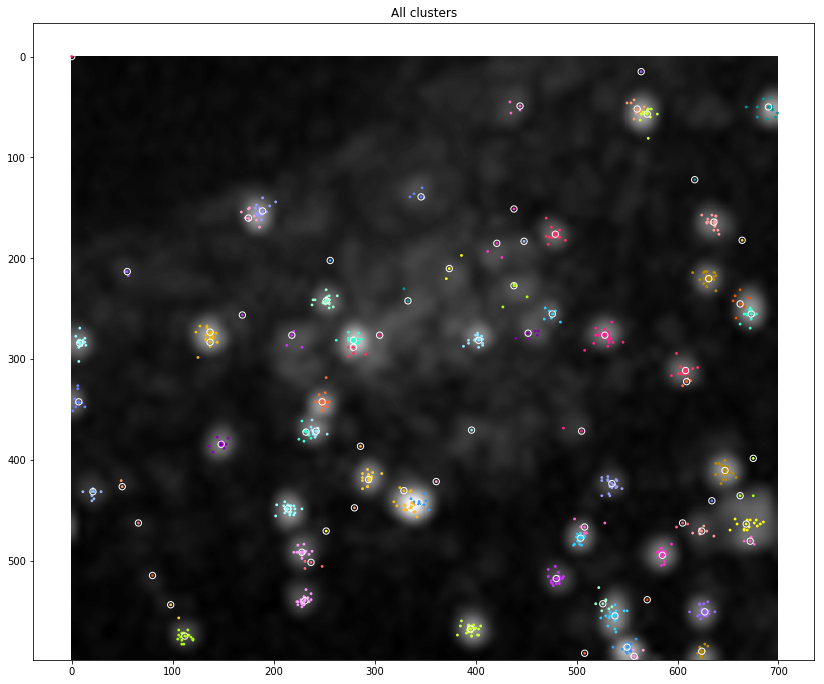

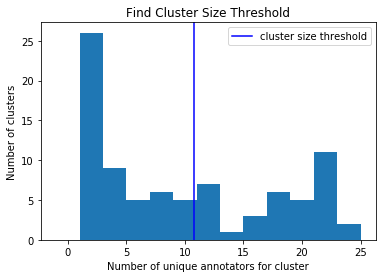

<Figure size 864x504 with 0 Axes>

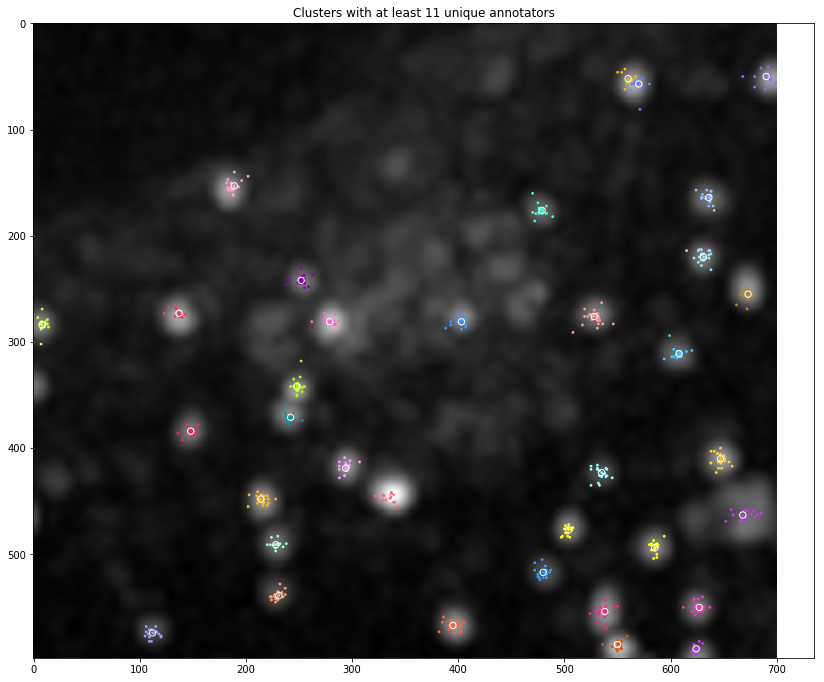

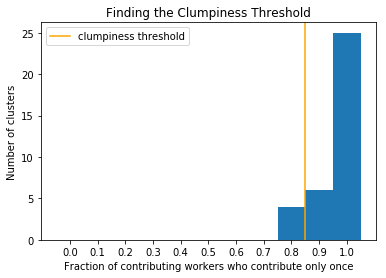

<Figure size 864x504 with 0 Axes>

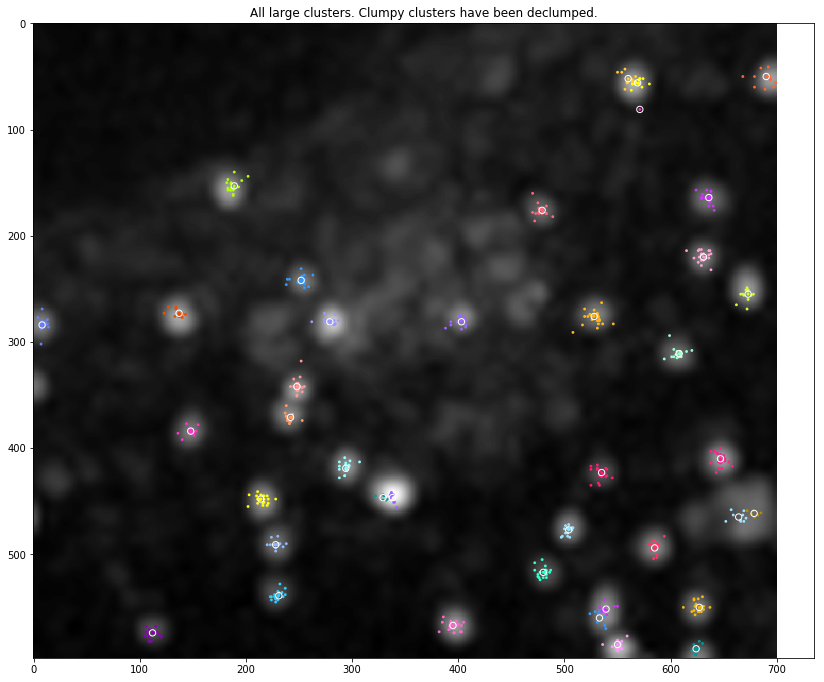

--------------------------- smfish_1.png ---------------------------


<Figure size 864x504 with 0 Axes>

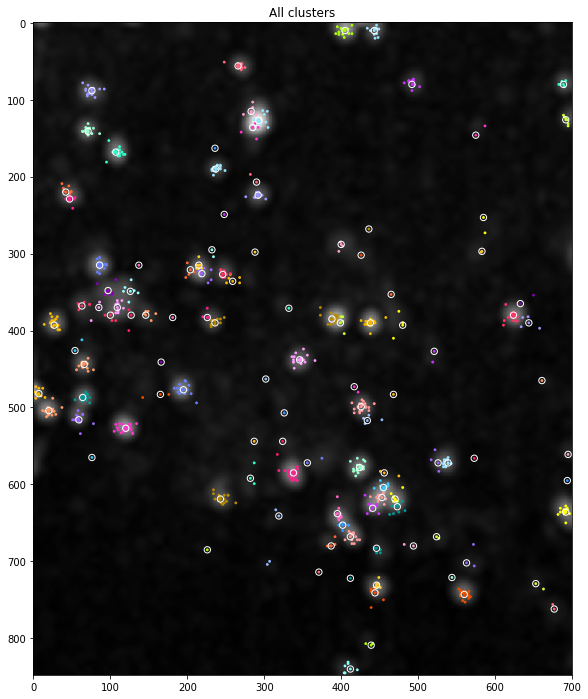

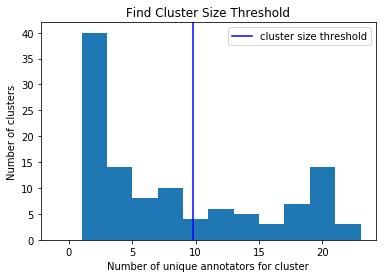

<Figure size 864x504 with 0 Axes>

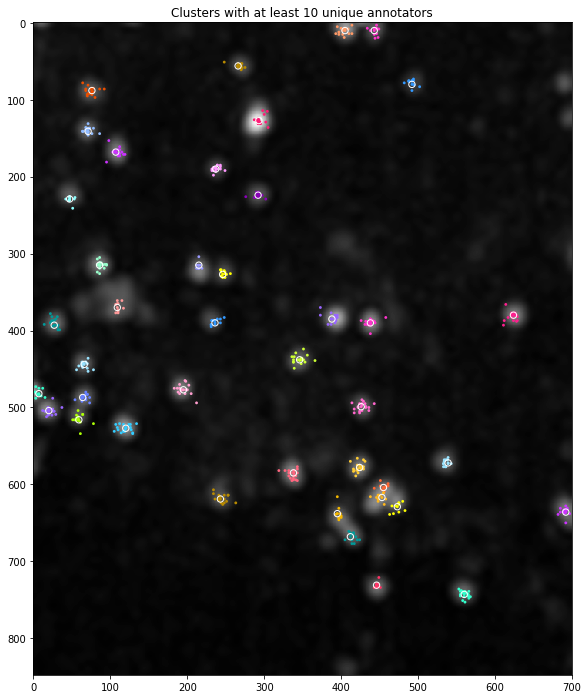

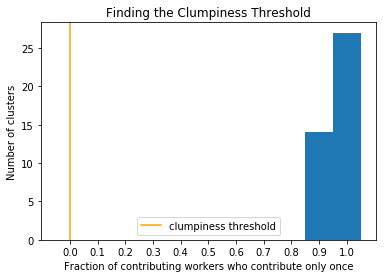

<Figure size 864x504 with 0 Axes>

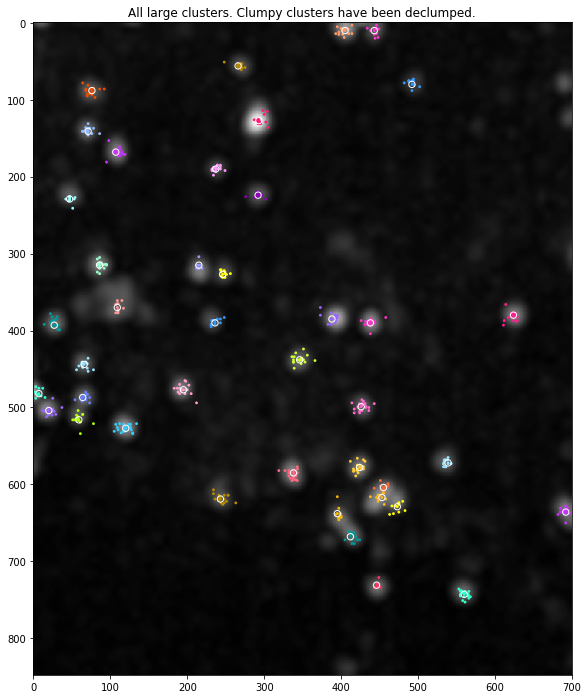

--------------------------- smfish_2.png ---------------------------


<Figure size 864x504 with 0 Axes>

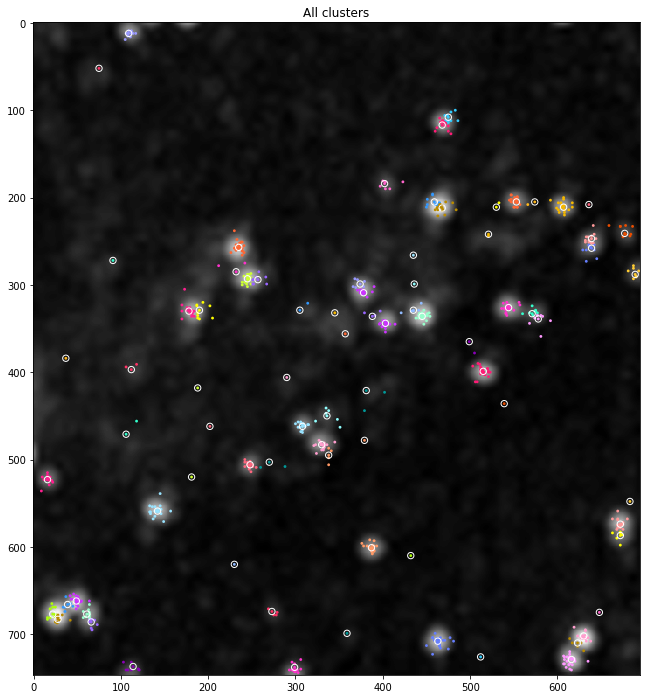

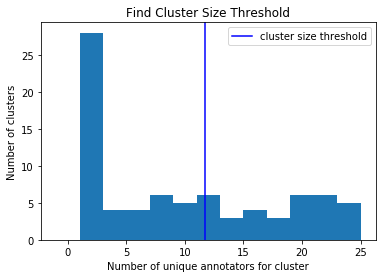

<Figure size 864x504 with 0 Axes>

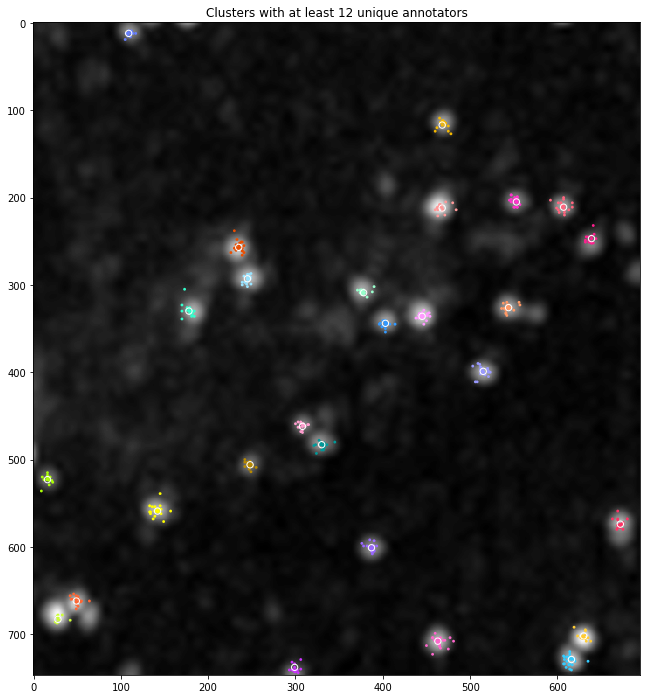

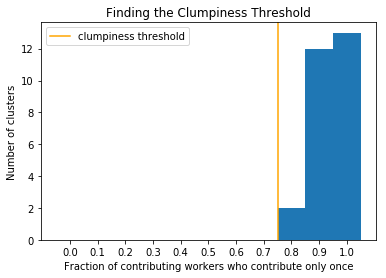

<Figure size 864x504 with 0 Axes>

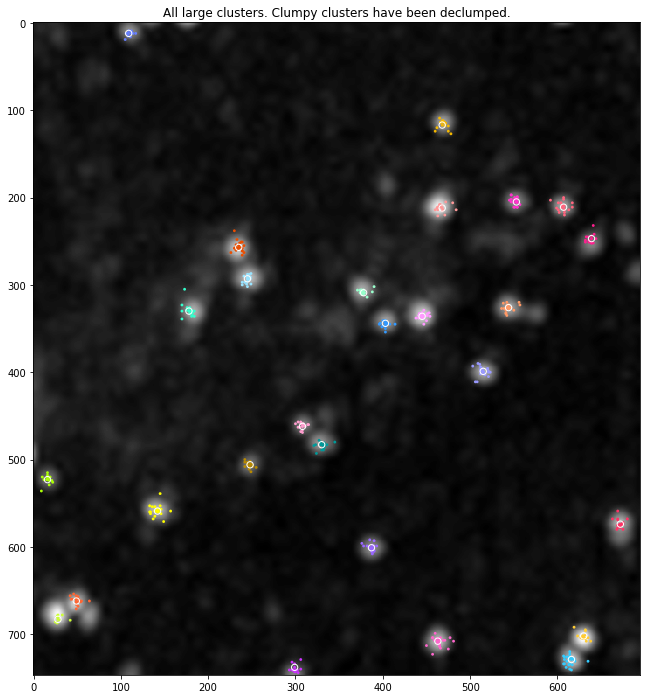

--------------------------- smfish_3.png ---------------------------


<Figure size 864x504 with 0 Axes>

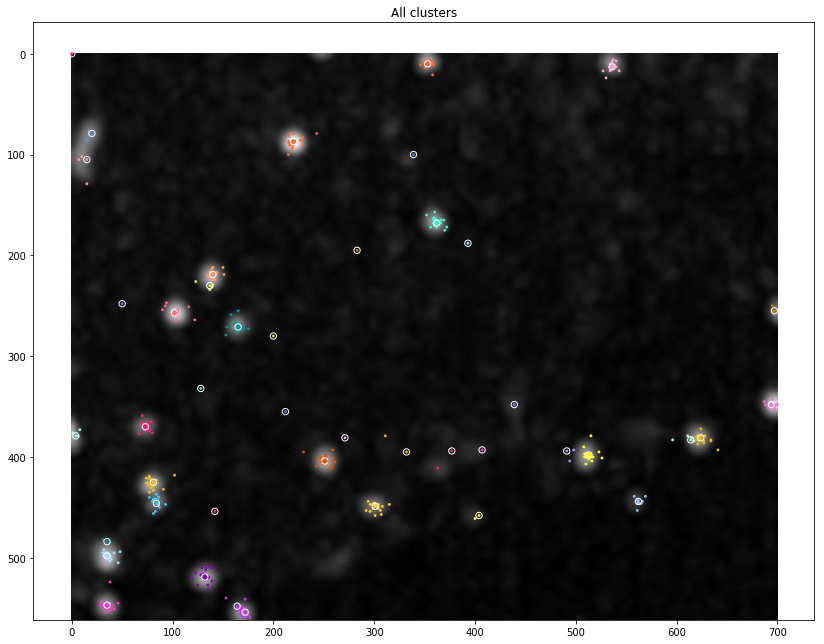

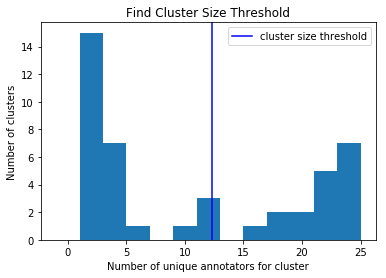

<Figure size 864x504 with 0 Axes>

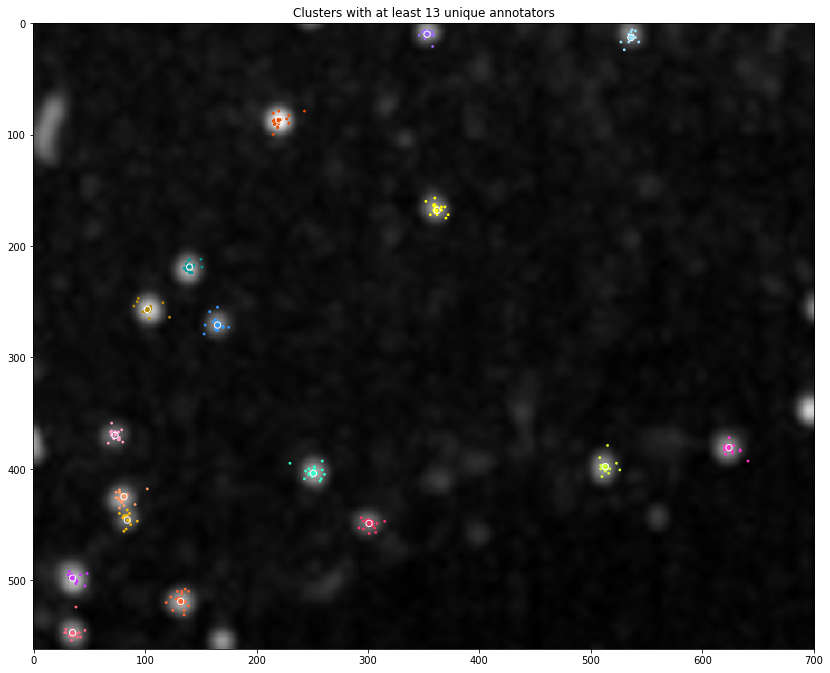

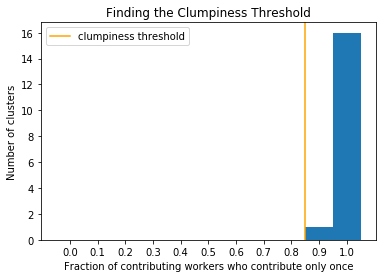

<Figure size 864x504 with 0 Axes>

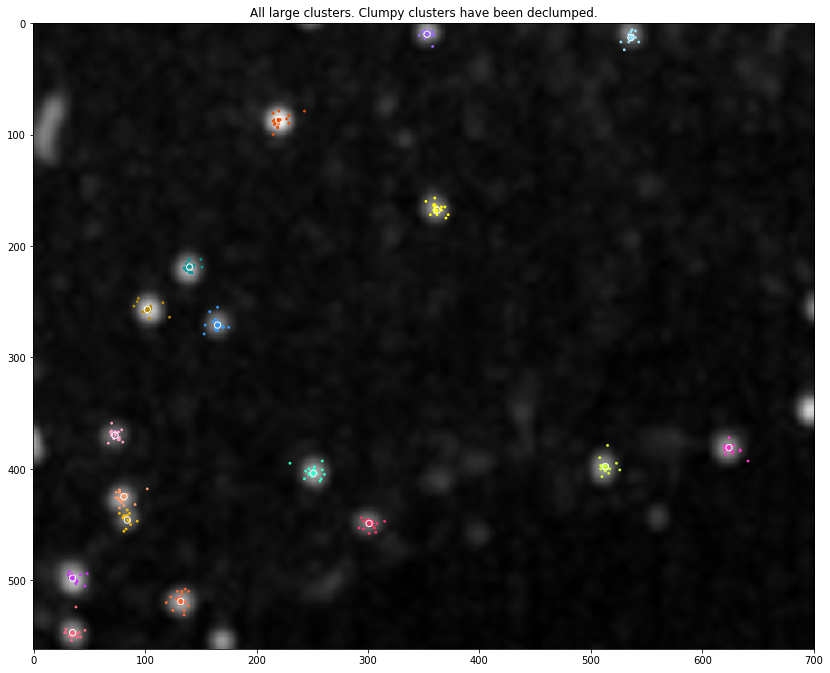

--------------------------- smfish_4.png ---------------------------


<Figure size 864x504 with 0 Axes>

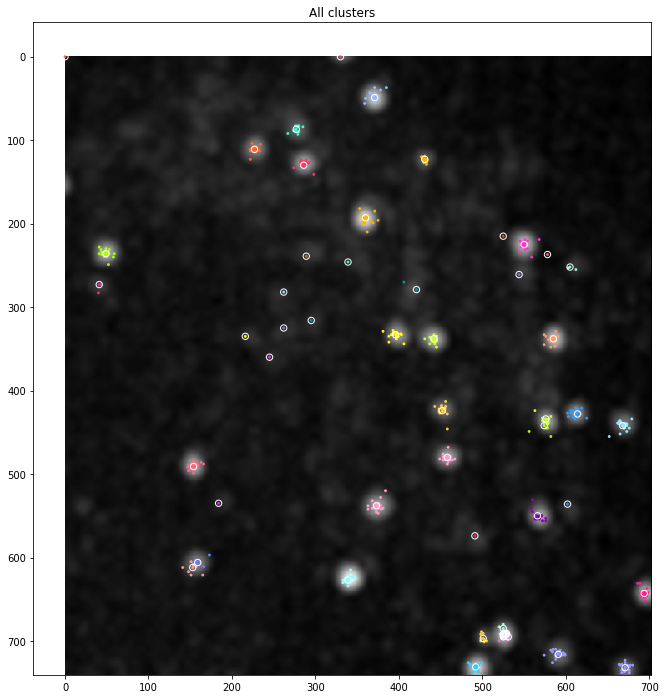

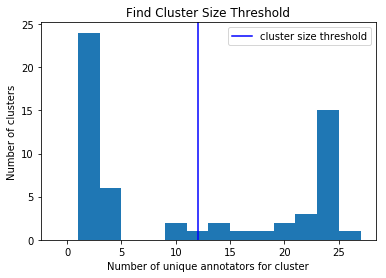

<Figure size 864x504 with 0 Axes>

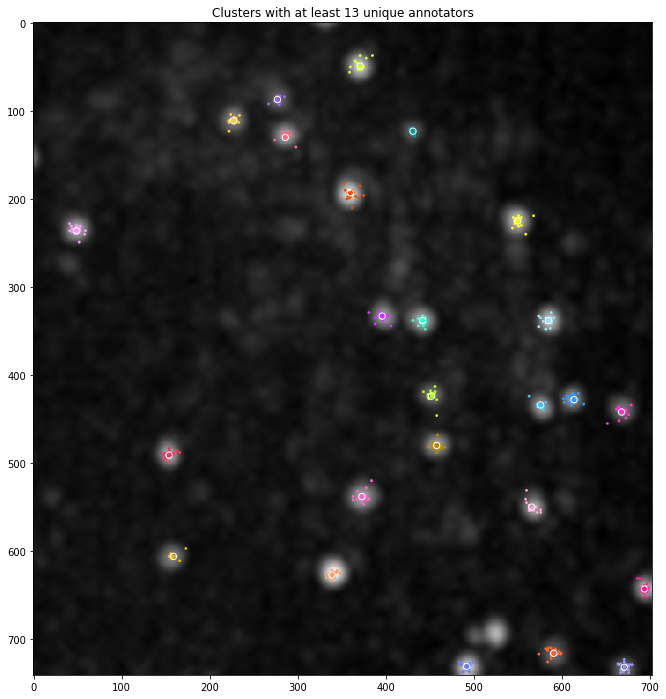

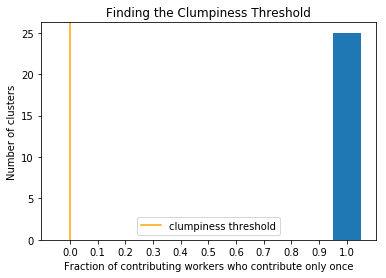

<Figure size 864x504 with 0 Axes>

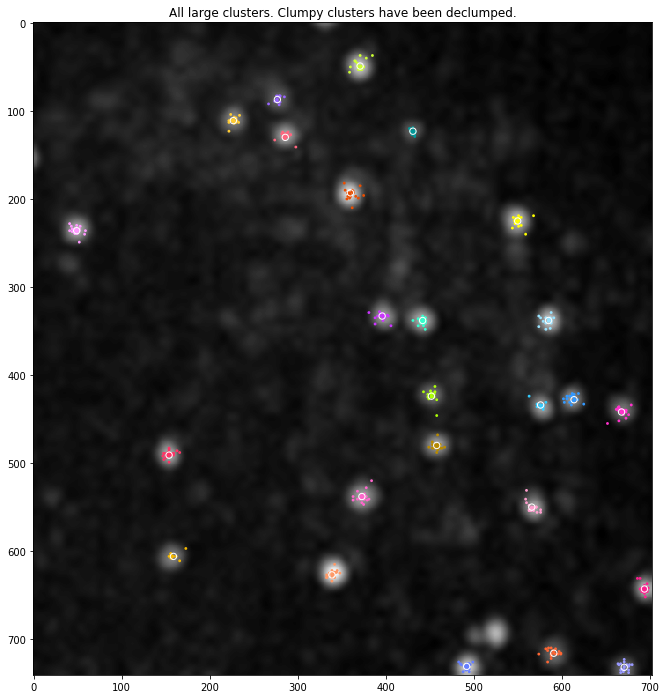

--------------------------- smfish_5.png ---------------------------


<Figure size 864x504 with 0 Axes>

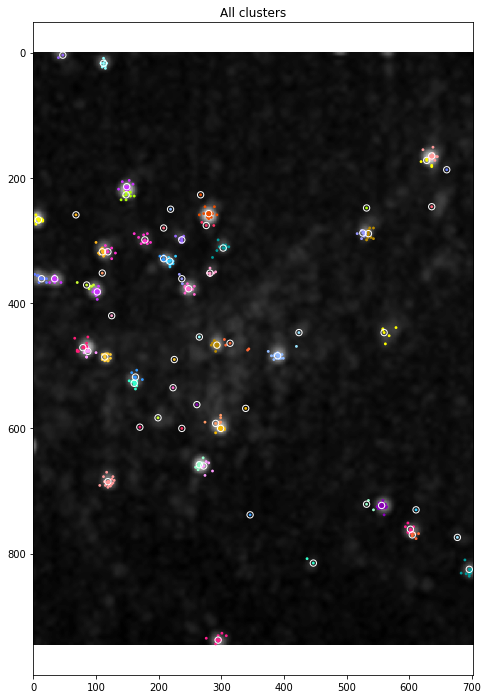

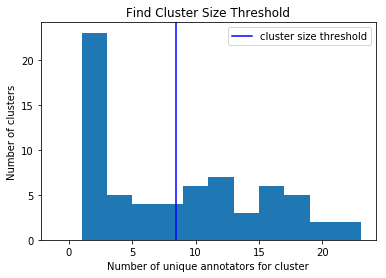

<Figure size 864x504 with 0 Axes>

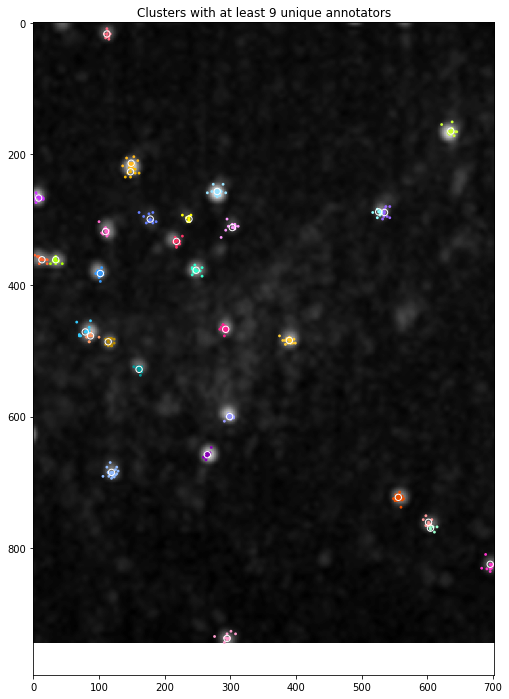

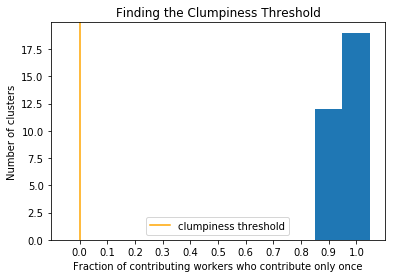

<Figure size 864x504 with 0 Axes>

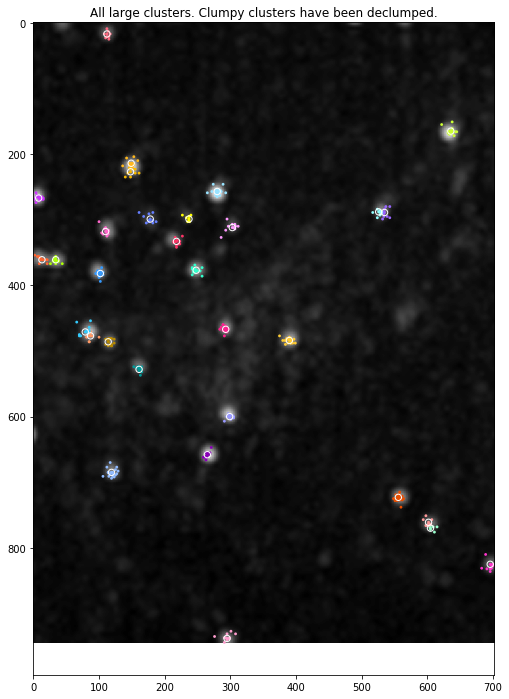

--------------------------- smfish_6.png ---------------------------


<Figure size 864x504 with 0 Axes>

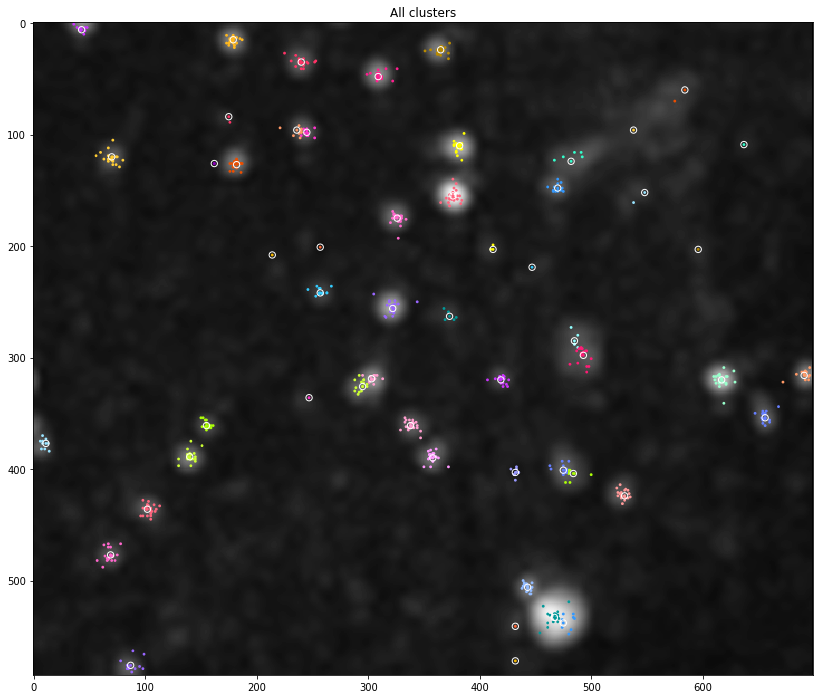

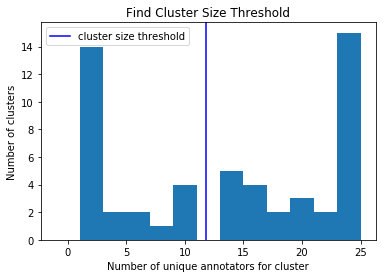

<Figure size 864x504 with 0 Axes>

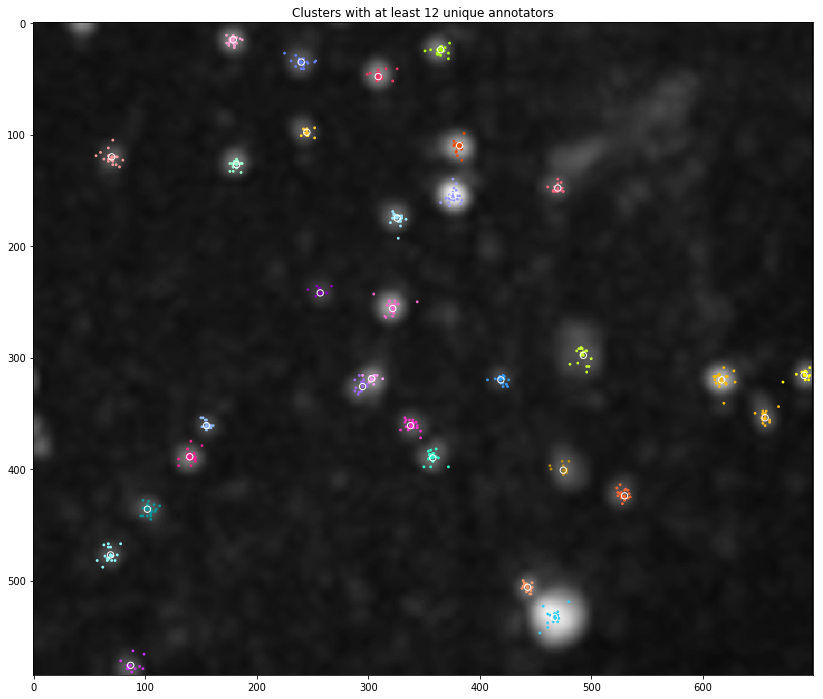

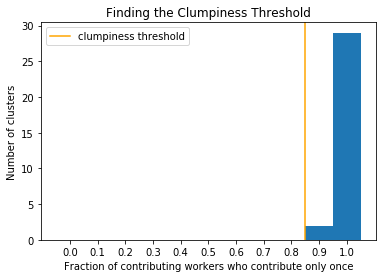

<Figure size 864x504 with 0 Axes>

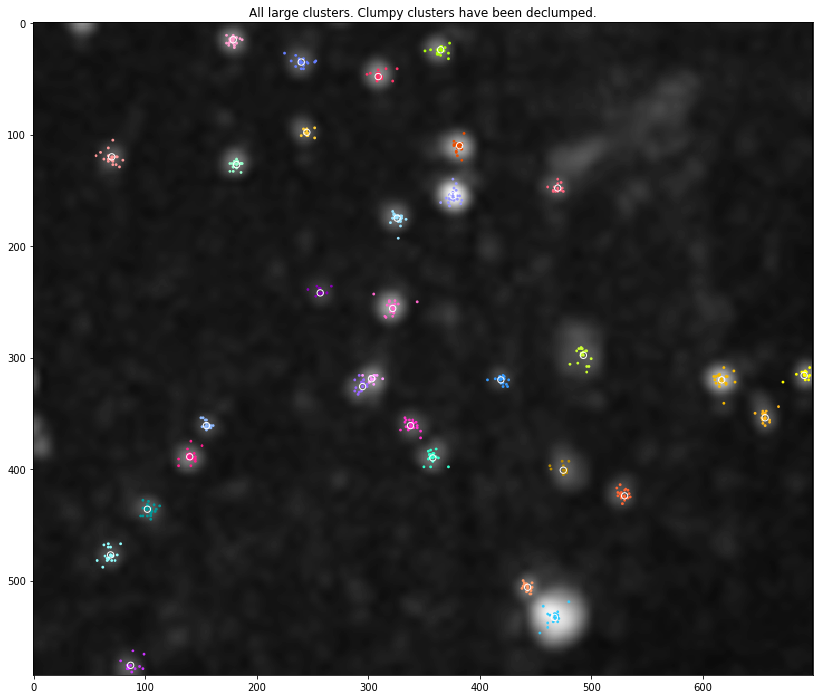

--------------------------- smfish_7.png ---------------------------


<Figure size 864x504 with 0 Axes>

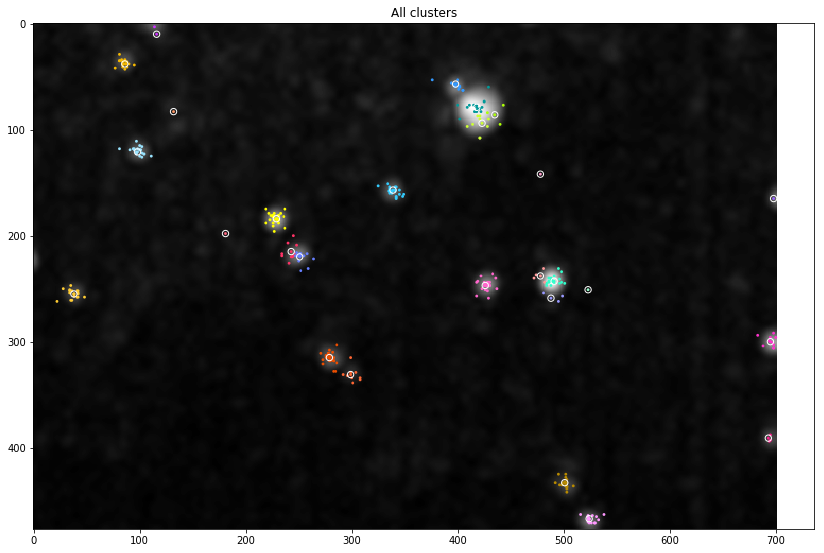

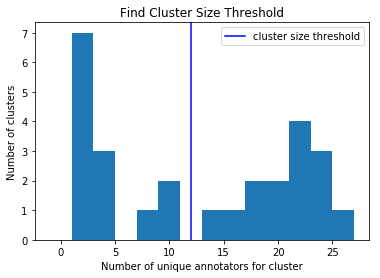

<Figure size 864x504 with 0 Axes>

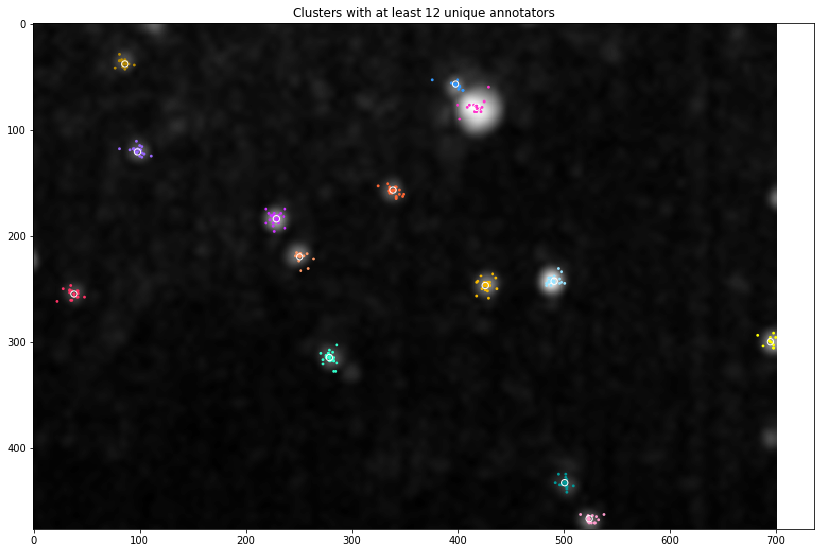

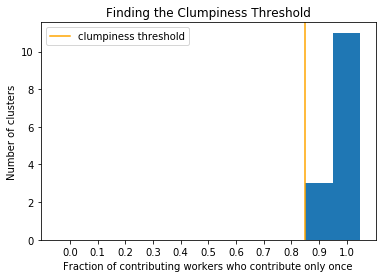

<Figure size 864x504 with 0 Axes>

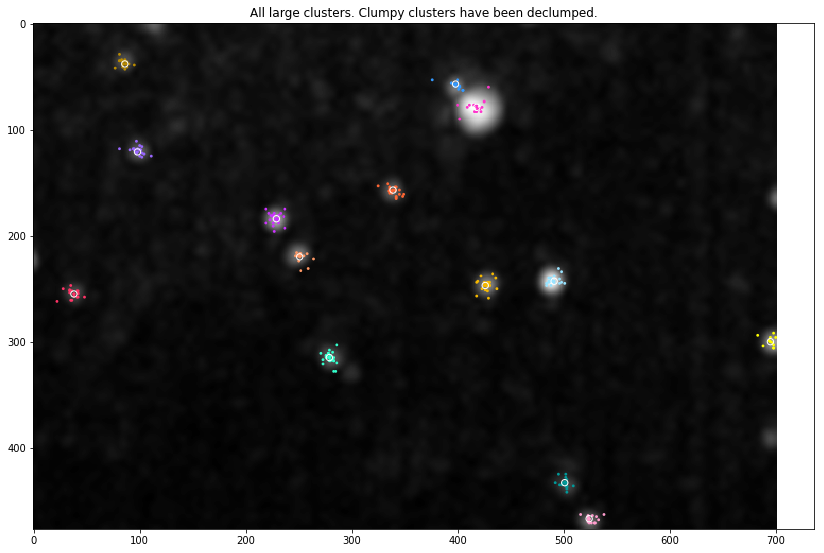

--------------------------- smfish_8.png ---------------------------


<Figure size 864x504 with 0 Axes>

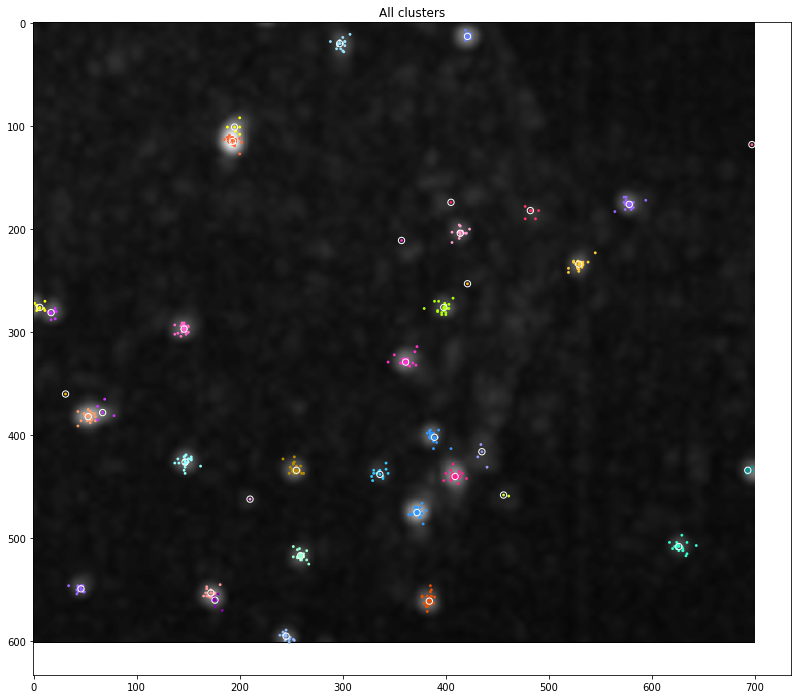

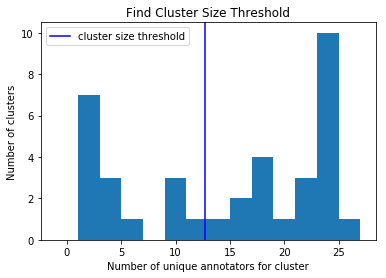

<Figure size 864x504 with 0 Axes>

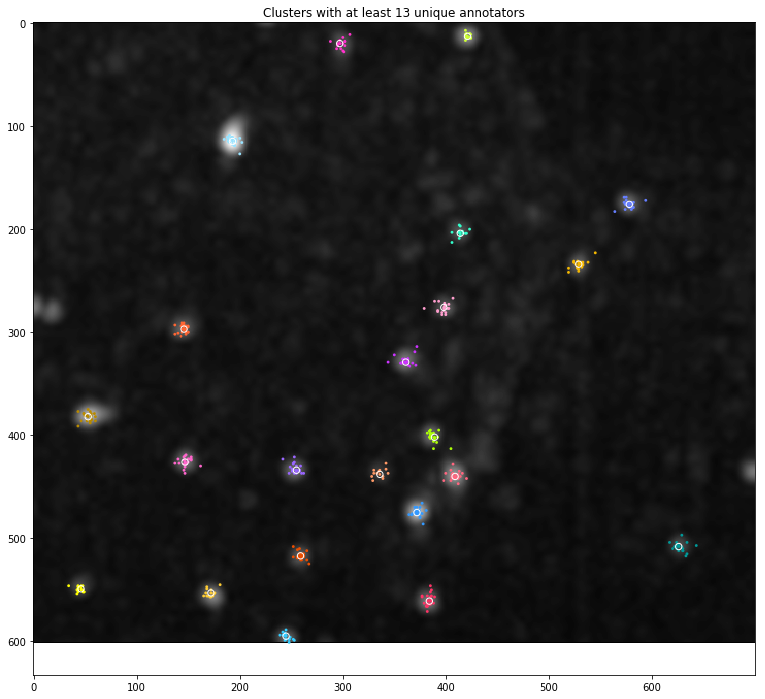

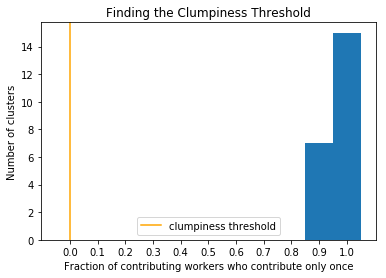

<Figure size 864x504 with 0 Axes>

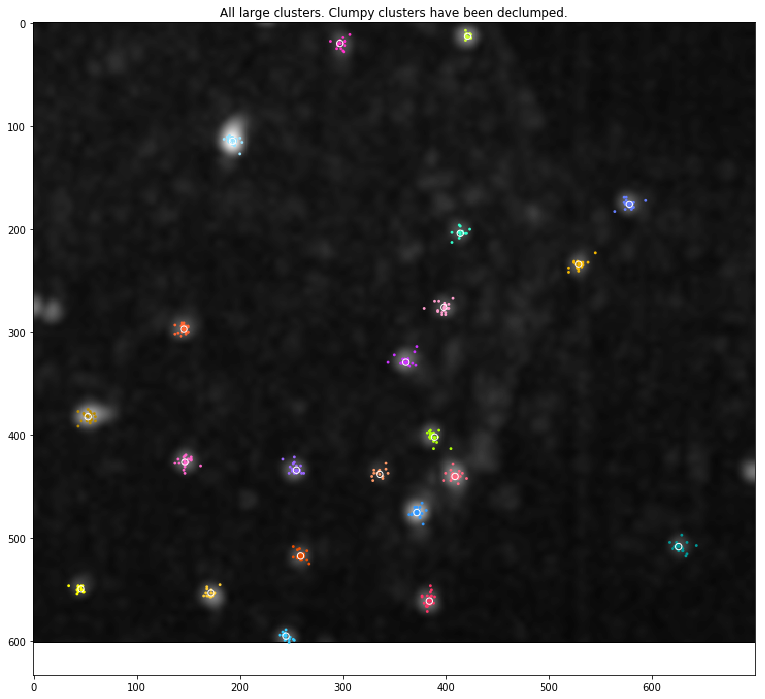

--------------------------- smfish_blacked.png ---------------------------


<Figure size 864x504 with 0 Axes>

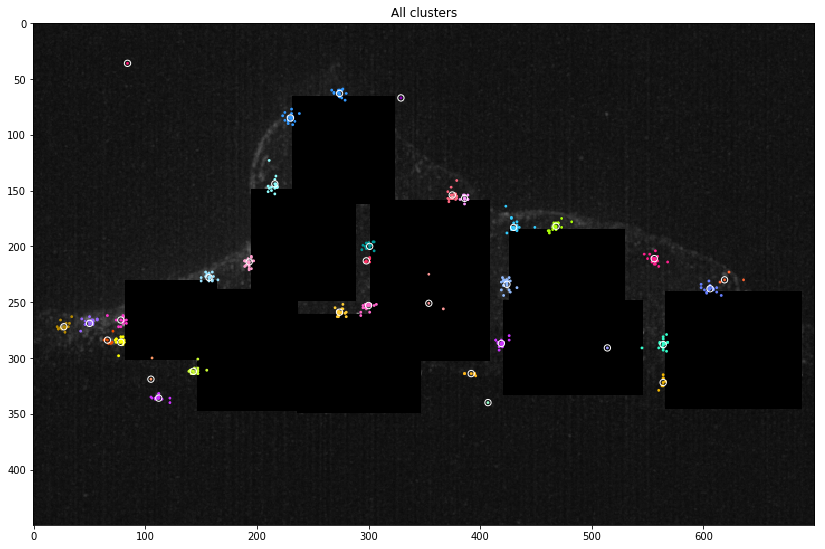

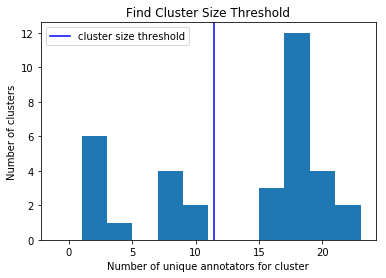

<Figure size 864x504 with 0 Axes>

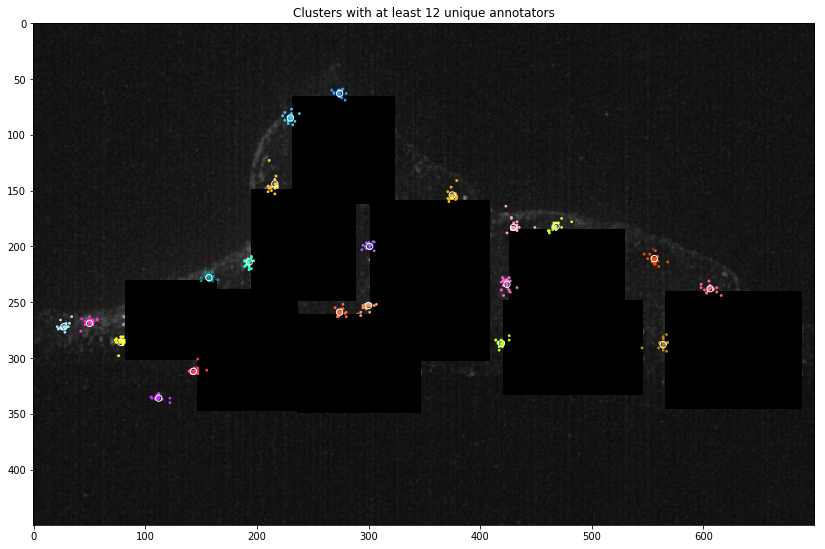

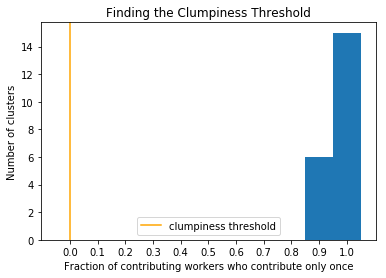

<Figure size 864x504 with 0 Axes>

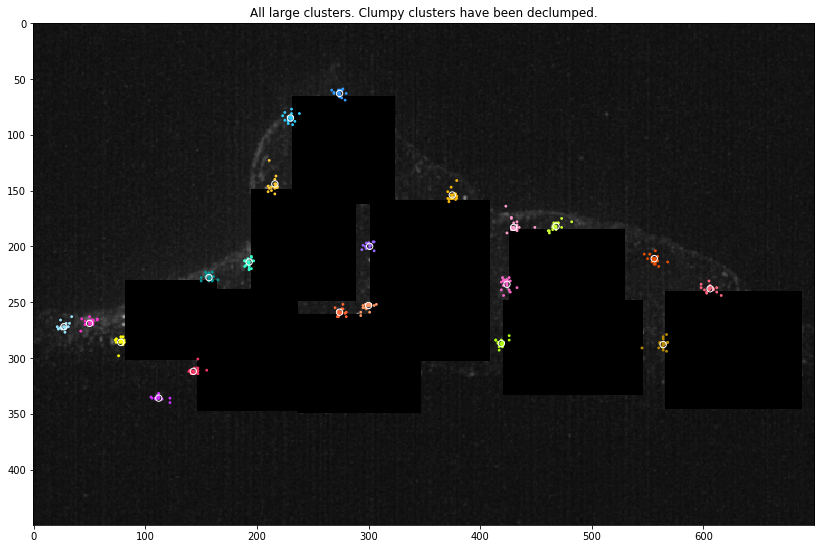

In [2]:
json_filepath = '/Users/jenny.vo-phamhi/Documents/FISH-annotation/Annotation/zoom_sm_fish_test.json'

img_names = ['smfish_' + str(i) for i in range(9)] + ['smfish_blacked']

for img_name in img_names:

    img_filename = img_name + '.png'
    
    print ('--------------------------- ' + img_filename + ' ---------------------------')
    img_filepath = '/Users/jenny.vo-phamhi/Documents/FISH-annotation/Annotation/zoom_test/' + img_filename
    csv_filepath = None

    qa = QuantiusAnnotation(json_filepath, img_filename)
    sa = SpotAnnotationAnalysis(qa)
    anno_all = qa.df()
    clustering_params = ['AffinityPropagation', -700]
    
    # Get clusters
    clusters = sa.get_clusters(anno_all, clustering_params)
    img_height = anno_all['height'].values[0]
    show_workers, show_centroids = True, True
    x_bounds, y_bounds, show_ref_points = None, None, False
    worker_marker_size, cluster_marker_size, ref_marker_size, bigger_window_size = 8, 40, None, True
    plot_title = 'All clusters'
    util.visualize_clusters(clusters, show_workers, show_centroids, show_ref_points, worker_marker_size, cluster_marker_size, ref_marker_size, csv_filepath, img_filepath, img_height, x_bounds, y_bounds, plot_title, bigger_window_size)
    
    # Get large clusters
    cluster_size_threshold = util.get_cluster_size_threshold(clusters)
    small_clusters, large_clusters = util.sort_clusters_by_size(clusters, cluster_size_threshold)
    util.plot_cluster_size_threshold(clusters, cluster_size_threshold)
    plot_title = 'Clusters with at least ' + str(math.ceil(cluster_size_threshold)) + ' unique annotators'
    util.visualize_clusters(large_clusters, show_workers, show_centroids, show_ref_points, worker_marker_size, cluster_marker_size, ref_marker_size, csv_filepath, img_filepath, img_height, x_bounds, y_bounds, plot_title, bigger_window_size)
    
    # Declump clumpy clusters
    clumpiness_threshold = util.plot_clumpiness_threshold(large_clusters)
    clumpy_clusters, nonclumpy_clusters = util.sort_clusters_by_clumpiness(large_clusters, clumpiness_threshold)
    declumping_params = ['KMeans', 2]
    result_clusters = nonclumpy_clusters
    for i in range(len(clumpy_clusters.index)):
        subclusters = util.declump(clumpy_clusters, i, declumping_params)
        result_clusters = pd.concat([subclusters, result_clusters], ignore_index=True)
    
    # Visualize all resulting clusters (including original nonclumpy and newly declumped)
    plot_title = 'All large clusters. Clumpy clusters have been declumped.'
    util.visualize_clusters(result_clusters, show_workers, show_centroids, show_ref_points, worker_marker_size, cluster_marker_size, ref_marker_size, csv_filepath, img_filepath, img_height, x_bounds, y_bounds, plot_title, bigger_window_size)
    
    # Save resulting centroids
    result_centroids = result_clusters.as_matrix(columns=['centroid_x', 'centroid_y'])
    np.savetxt(img_name + '_coords.csv', result_centroids, delimiter=",", comments='', header = "centroid_x,centroid_y")
    